# Imports e instalações

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import basedosdados as bd
from google.auth import auth
from google.cloud import bigquery

ImportError: cannot import name 'auth' from 'google.auth' (c:\ProgramData\Anaconda3\lib\site-packages\google\auth\__init__.py)

# Imports dos dados

## Login no gcloud

In [5]:
project = 'dados-ibge-384913'
location = 'US'
client = bigquery.Client(project=project, location=location)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\allys\AppData\Local\Temp\ipykernel_91304\4013440980.py", line 3, in <module>
    client = bigquery.Client(project=project, location=location)
  File "c:\ProgramData\Anaconda3\lib\site-packages\google\cloud\bigquery\client.py", line 209, in __init__
    super(Client, self).__init__(
  File "c:\ProgramData\Anaconda3\lib\site-packages\google\cloud\client\__init__.py", line 321, in __init__
    Client.__init__(
  File "c:\ProgramData\Anaconda3\lib\site-packages\google\cloud\client\__init__.py", line 178, in __init__
    credentials, _ = google.auth.default(scopes=scopes)
  File "c:\ProgramData\Anaconda3\lib\site-packages\google\auth\_default.py", line 648, in default
google.auth.exceptions.DefaultCredentialsError: Your default credentials were not found. To set up Application De

## Querys para buscar no firebase

In [ ]:
query_populacao = "SELECT db.ano, db.populacao FROM `basedosdados.br_ibge_populacao.municipio` as db WHERE db.id_municipio = '2503704'"

## Import dos dados do IBGE

In [ ]:
# Para carregar o dado direto no pandas
df_ibge_populacao = client.query(query_populacao).to_dataframe()

## Conversões nos dados

### Conversão na coluna ano do DF df_ibge_populacao

In [ ]:
# dados originais
df_ibge_populacao.dtypes

ano          int64
populacao    int64
dtype: object

In [ ]:
# dados apos conversao para dt
df_ibge_populacao['ano'] = pd.to_datetime(df_ibge_populacao['ano'], format='%Y')
df_ibge_populacao

,ano,populacao
0,1991-01-01,51273
1,1992-01-01,51530
2,1993-01-01,51965
3,1994-01-01,52279
4,1995-01-01,52586
5,1996-01-01,51396
6,1997-01-01,51575
7,1998-01-01,51726
8,1999-01-01,51878
9,2000-01-01,54715


In [ ]:
# dados apos a conversao
df_ibge_populacao.dtypes

ano          datetime64[ns]
populacao             int64
dtype: object

# Análises

## Visual - Plot dos gráficos

### Time series da população cajezeirense de 1991 a 2021

In [ ]:
df_ibge_populacao_index_ano = df_ibge_populacao.set_index('ano')

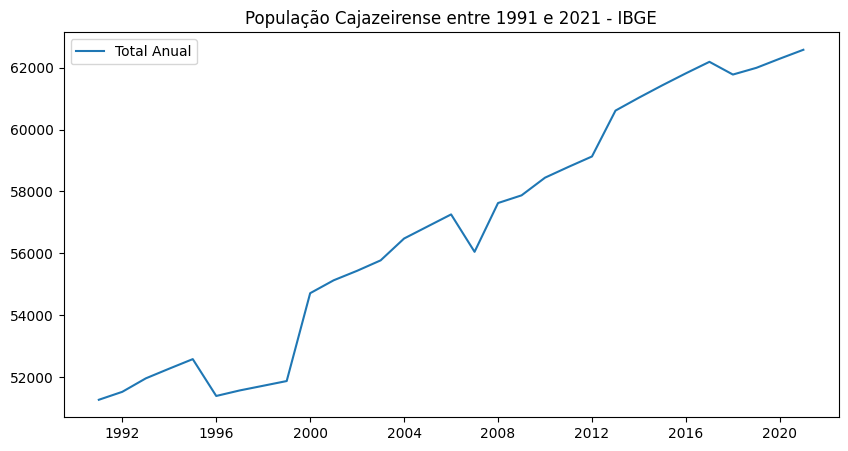

In [ ]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['populacao'], label='Total Anual')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('População Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

In [ ]:
df_ibge_populacao_index_ano['variacao_anual'] = df_ibge_populacao_index_ano['populacao'].diff()
df_ibge_populacao_index_ano['porcentagem_variacao_anual_%'] = ((df_ibge_populacao_index_ano['variacao_anual'] / df_ibge_populacao_index_ano['populacao'].shift(1)) * 100).round(2)
df_ibge_populacao_index_ano['aceleracao_variacao_anual'] = df_ibge_populacao_index_ano['variacao_anual'].diff()
df_ibge_populacao_index_ano['porcentagem_aceleracao_variacao_anual_%'] = ((df_ibge_populacao_index_ano['aceleracao_variacao_anual'] / df_ibge_populacao_index_ano['variacao_anual'].shift(1)) * 100).round(2)
df_ibge_populacao_index_ano

,populacao,variacao_anual,porcentagem_variacao_anual_%,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual_%
ano,,,,,
1991-01-01,51273,NaN,NaN,NaN,NaN
1992-01-01,51530,257.0,0.50,NaN,NaN
1993-01-01,51965,435.0,0.84,178.0,69.26
1994-01-01,52279,314.0,0.60,-121.0,-27.82
1995-01-01,52586,307.0,0.59,-7.0,-2.23
1996-01-01,51396,-1190.0,-2.26,-1497.0,-487.62
1997-01-01,51575,179.0,0.35,1369.0,-115.04
1998-01-01,51726,151.0,0.29,-28.0,-15.64
1999-01-01,51878,152.0,0.29,1.0,0.66


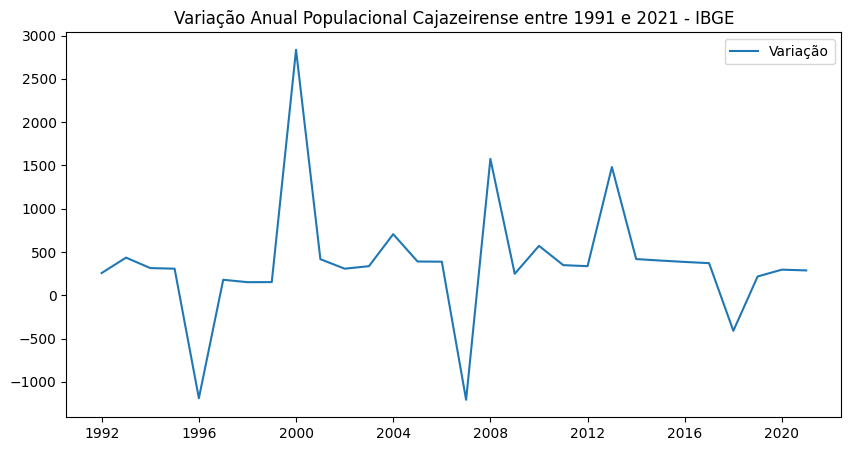

In [ ]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['variacao_anual'], label='Variação')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação Anual Populacional Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

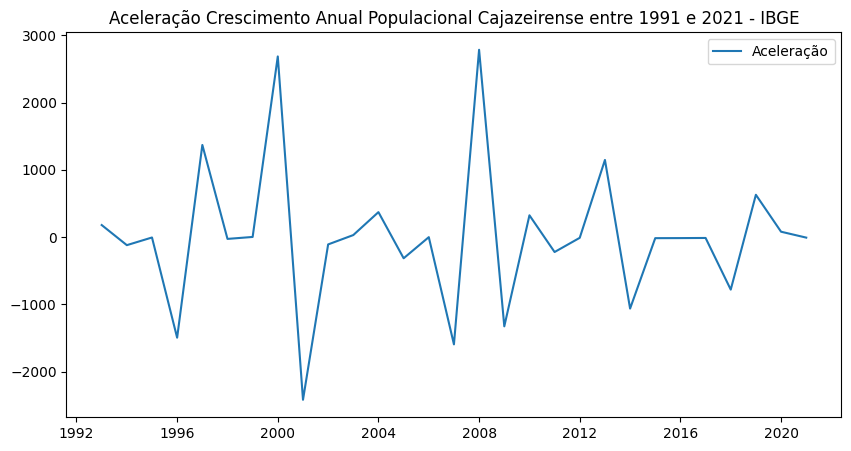

In [ ]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['aceleracao_variacao_anual'], label='Aceleração')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração Crescimento Anual Populacional Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

In [ ]:
df_ibge_populacao_index_ano['variacao_anual'].sum()

11303.0

In [ ]:
df_ibge_populacao_index_ano['aceleracao_variacao_anual'].sum()

30.0

In [ ]:
(df_ibge_populacao_index_ano['porcentagem_variacao_anual_%'].sum()).round(2)

20.25

In [ ]:
media_aceleracao = ((df_ibge_populacao_index_ano['porcentagem_aceleracao_variacao_anual_%'].sum())/df_ibge_populacao_index_ano.shape[0]).round(2)
media_aceleracao

14.18